## CS224 - Winter 2023
## PROGRAMMING ASSIGNMENT 1 - Principal Component Analysis (PCA)

### Due: February 13, 2023 @ 11:59pm PDT

**Submission Method**: Export the Jupyter notebook as **PDF** and submit the PDF file on **Gradescope**. Please **LINK** each question from the assignment in Gradescope to the location of its answer in your PDF. (For more details, see the Assignment Guidelines.)

**Maximum points**: 10

<div style="margin-bottom: 15px; padding: 15px; color: #31708f; background-color: #d9edf7; border: 1px solid #bce8f1; border-radius: 5px;">
    
<b><font size=+2>Enter your information below:</font></b></br></br>

  <b>(full) Name</b>: Shreyans Magdum
  </br>

  <b>Student ID Number</b>:  862254814
  </br></br>
    
<b>By submitting this notebook, I assert that the work below is my own work, completed for this course.  Except where explicitly cited, none of the portions of this notebook are duplicated from anyone else's work or my own previous work.</b>
</div>

<div style="padding: 15px; color: #8a6d3b; background-color: #fcf8e3; border: 1px solid #faebcc; border-radius: 5px;">
<b><font size=+2>Academic Integrity</font></b></br> 
Each assignment should be done  individually. You may discuss general approaches with other students in the class, and ask questions to the TA, but  you must only submit work that is yours . If you receive help by any external sources (other than the TA and the instructor), you must properly credit those sources. The UCR Academic Integrity policies are available at <a href="http://conduct.ucr.edu/policies/academicintegrity.html" target="_blank">http://conduct.ucr.edu/policies/academicintegrity.html</a>.
</div>

# Overview 
In this assignment, We will implement PCA, apply it to the [**MNIST**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) dataset, and observe how the reconstruction changes as we change the number of principal components used.

For this assignment we will use the functionality of [Numpy](http://www.numpy.org/), and [Matplotlib](https://matplotlib.org/).

*   Before you start, make sure you have installed all those packages in your local Jupyter instance.
*   If you are asked to implement a particular functionality, you should **not** use an existing implementation from the libraries above (or some other library that you may find). When in doubt, **please just ASK**.
*   It's okay to use functions in `numpy.linalg` to calculate matrix decomposition (e.g., `la.eig()`, `la.svd()`), but using built-in functions like `sklearn.decomposition.PCA()` will **not** get you any points.


Please read **all** cells carefully and answer **all** parts (both text and missing code). You will need to complete all the code marked `TODO` and answer descriptive/derivation questions.

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
# DO NOT REMOVE THE CODE ABOVE

## Question 1 [10 points]

**Preliminaries**

The [**MNIST**](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

First, Let's import the images and vectorize each image in the dataset.

In [10]:
mnist = load_digits()
imgs = mnist.data

Compute the mean of the images and subtract out the mean.

In [11]:
mean = np.mean(imgs, axis=0)
imgsOG=imgs.copy()
imgs -= mean 
# print("Imgs Shape: ", imgs.shape)
# print("Imgs[0] Shape: ", imgs[0].shape)
N=len(imgs)
# print(N)
R = np.matmul(imgs.T , imgs)/(N-1)
# print("R Shape: ", R.shape)



Let us call each zero mean vectorized image to be $X$. For $N$ images, you have $X_1,X_2,\dots,X_N$. Compute $[X^\top X]= R$.

**(a) [2 points]** Perform a principal components analysis of $R = V\Lambda V^\top$.

In [12]:
#TODO
import numpy.linalg as la
values,vectors=la.eig(R)
# print("Eigen Values: ", values)
# print("Eigen Vectors: ", vectors)
vectorsT=vectors.T
temp=[]
# print(vectorsT.shape)
for i in range(0,len(values)):
  temp.append([values[i],vectorsT[i]])
# print(temp)
temp.sort(key=lambda x:x[0],reverse=True)
vecsTS=[]
for i in range(0,len(temp)):
  vecsTS.append(temp[i][1])
vecsTS=np.array(vecsTS)
# print(vecsTS.shape)

# print(temp2.shape)
# print(temp[0],temp[1])


**(b) [2 points]** Analyze the eigenvalues in $\Lambda$ and decide which eigenvalues to retain and which can be set to zero. 

* You may want to plot the eigenvalues, the fraction of variance explained, AIC, or BIC, and set a threshold.

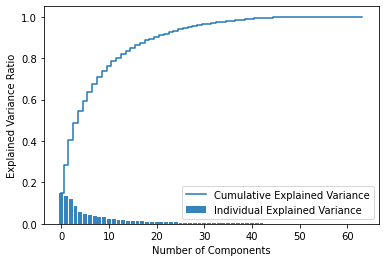

Threshold:  17


In [13]:
# TODO
total = np.sum(values)
varExp = [(i/total) for i in sorted(values, reverse=True)]
cumSum = np.cumsum(varExp)
plt.bar(range(0,len(varExp)), varExp, alpha=0.9, align='center', label='Individual Explained Variance')
plt.step(range(0,len(cumSum)), cumSum, where='mid',label='Cumulative Explained Variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.legend()
plt.show()

tsum=0
count=0
for i in varExp:
  tsum+=i
  count+=1
  if(tsum>0.85):
    break
    
print("Threshold: ", count)
candidates=vecsTS[0:count]
pca = np.matmul(imgs, candidates.T)
# print("New dimensionality: ", pca.shape)

**(c) [2 points]**  Reconstruct an approximation of each X after removing some of the small eigenvalues. (Display only a couple of the reconstructed **images**, and you will need to add the mean back.)

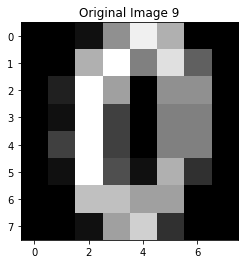

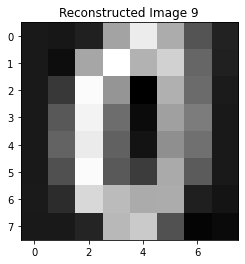

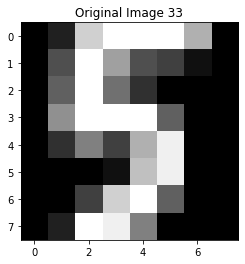

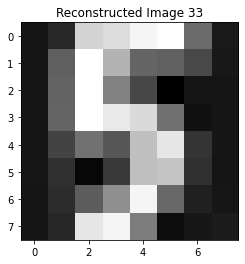

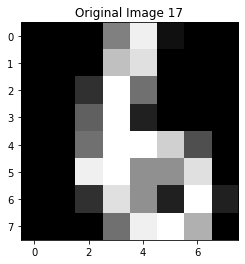

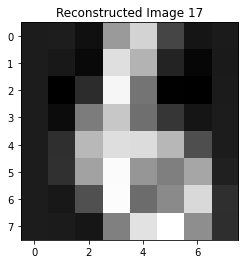

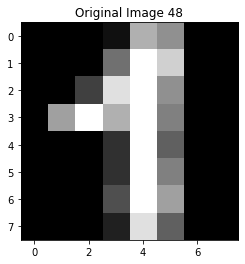

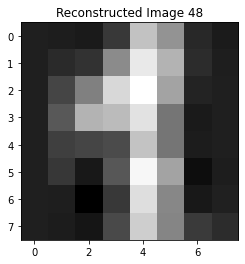

In [14]:
# TODO
pinv = la.pinv(candidates.T)
reconst=np.matmul(pca,pinv)
reconstOG=reconst.copy()
reconst+=mean

plt.gray()
plt.title("Original Image 9")
plt.imshow(imgsOG[10].reshape(8,8))
plt.show()
plt.title("Reconstructed Image 9")
plt.imshow(reconst[10].reshape(8,8))
plt.show()

plt.title("Original Image 33")
plt.imshow(imgsOG[32].reshape(8,8))
plt.show()
plt.title("Reconstructed Image 33")
plt.imshow(reconst[32].reshape(8,8))
plt.show()

plt.title("Original Image 17")
plt.imshow(imgsOG[16].reshape(8,8))
plt.show()
plt.title("Reconstructed Image 17")
plt.imshow(reconst[16].reshape(8,8))
plt.show()

plt.title("Original Image 48")
plt.imshow(imgsOG[47].reshape(8,8))
plt.show()
plt.title("Reconstructed Image 48")
plt.imshow(reconst[47].reshape(8,8))
plt.show()

**(d) [2 points]**  Compute the error between the reconstructed X and original image. (The mean of the original data should **not** be included in the error.)

In [15]:
# TODO
error = np.mean(np.square(imgs-reconstOG))
print("Reconstruction Error: ", error)

Reconstruction Error:  2.5796427246481084


**(e) [2 points]**  Analyze by choosing different numbers of eigenvalues to be zeroed out. Provide a short summary of your conclusions based on this analysis.

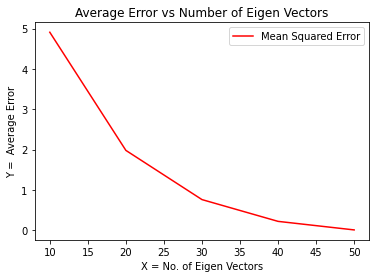

In [16]:
# TODO
data = np.array([
    [10, 4.91],
    [20, 1.98],
    [30, 0.76],
    [40, 0.22],
    [50, 0.008]
])
xCoods=[]
yCoods=[]
for i in data:
    xCoods.append(i[0])
    yCoods.append(i[1])
plt.title("Average Error vs Number of Eigen Vectors")
plt.plot(xCoods, yCoods, color="r", label="Mean Squared Error")
plt.xlabel("X = No. of Eigen Vectors")
plt.ylabel("Y =  Average Error")
plt.legend()
plt.show()

Conclusions:
1. It can be seen that the error (MSE) drops as number of eigen vectors used is increased.
2. The error (MSE) is roughly 2.58 after selecting a threshold of 17 eigen vectors.